In [1]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## White Noise
### Random process timeseries where x(t) is drawn from a random normal distribution at each t.  

count    1000.000000
mean       -0.002427
std         1.011792
min        -3.492071
25%        -0.695970
50%        -0.048654
75%         0.688202
max         3.101757
dtype: float64


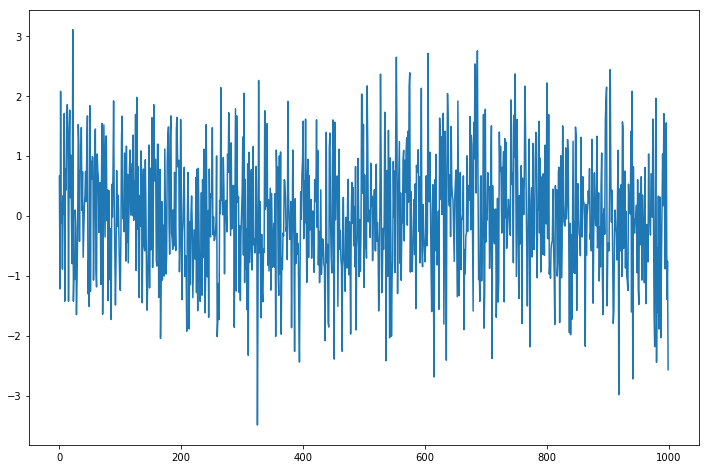

In [2]:
N = 1e3
time = np.arange(N)
xn = np.random.normal(size=time.shape)
series_xn = Series(xn)
print(series_xn.describe()) #Panda summary stats
plt.figure(figsize=(12,8)); series_xn.plot() ;plt.show()

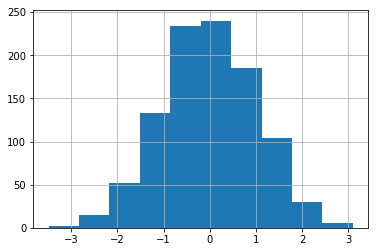

In [3]:
# histogram plot
series_xn.hist()
plt.show()

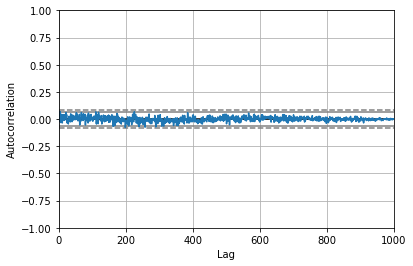

In [4]:
# autocorrelation
plt.figure()
autocorrelation_plot(series_xn)

### Power spectrum

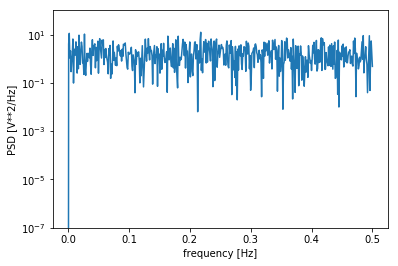

In [6]:
from scipy import signal
f, Pxn_den = signal.periodogram(xn)
plt.semilogy(f, Pxn_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

### Superimpose white noise on a signal

count    1000.000000
mean        0.011429
std         5.887261
min       -12.941595
25%        -4.081907
50%         0.020229
75%         4.015978
max        12.420885
dtype: float64


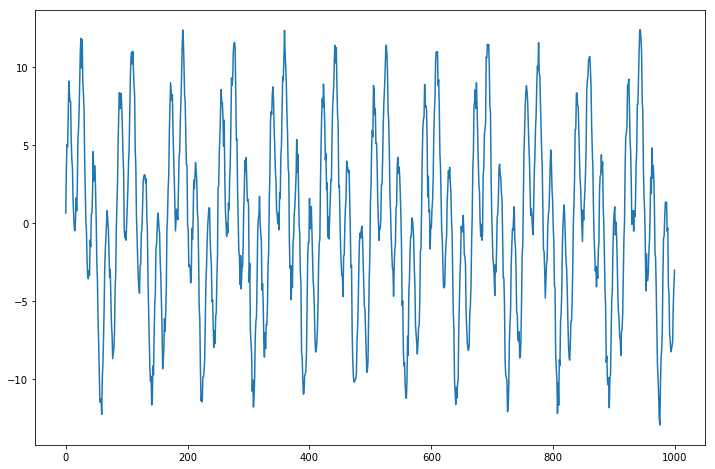

In [26]:
#Generate a test signal, a 2 Vrms sine wave at 12 Hz, corrupted by 0.001 V**2/Hz of white noise sampled at 100 Hz.
fs = 10e2
freq = 12.0
amp = 4.1345*np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
xx = amp*(np.sin(2*np.pi*freq*time)+np.sin(2*4*np.pi*freq*time))
xx += np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
series_xx = Series(xx)
# summary stats
print(series_xx.describe())
# line plot
plt.figure(figsize=(12,8))
series_xx.plot()
plt.show()

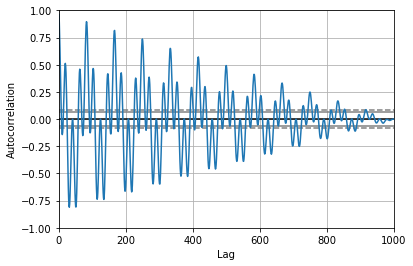

In [27]:
# autocorrelation
plt.figure()
autocorrelation_plot(series_xx)

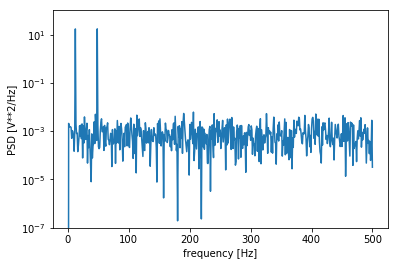

In [28]:
from scipy import signal
f, Pxx_den = signal.periodogram(xx, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [29]:
#The peak height in the power spectrum is an estimate of the RMS amplitude
np.sqrt(Pxx_den.max())

4.137392830580954